# Анализ оттока клиентов сети фитнес-центров «Культурист-датасаентист» 

### цель проекта:
провести анализ и подготовить план действий по удержанию клиентов

### задачи проекта:

- спрогнозировать вероятность оттока;
- сформировать типичные портреты пользователей;
- проанализировать основные признаки, наиболее сильно влияющие на отток;
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами.

#### Описание данных:
- 'gender' — пол;
- 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
- 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- 'Phone' — наличие контактного телефона;
- 'Age' — возраст;
- 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
- 'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
- 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
- 'Group_visits' — факт посещения групповых занятий;
- 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
- 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
- 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

# Структура проекта:

##### 1. Изучение общей информации    *[jump to code cell 1](#cell1)
##### 2. Преобработка данных  *[jump to code cell 2](#cell2)
##### 3. Анализ данных:

- анализ данных (EDA) *[jump to code cell 3](#cell3)

- модель прогнозирования оттока пользователей   *[jump to code cell 4](#cell4)

- кластеризация пользователей         *[jump to code cell 5](#cell5)

- общий вывод и рекомендации   *[jump to code cell 6](#cell6)

## Общая информация

<a id="cell1"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv('gym_churn.csv')

In [3]:
df.head(5)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Для удобства анализа информации далее приедем названия столбцов к нижнему регистру

In [4]:
df.shape

(4000, 14)

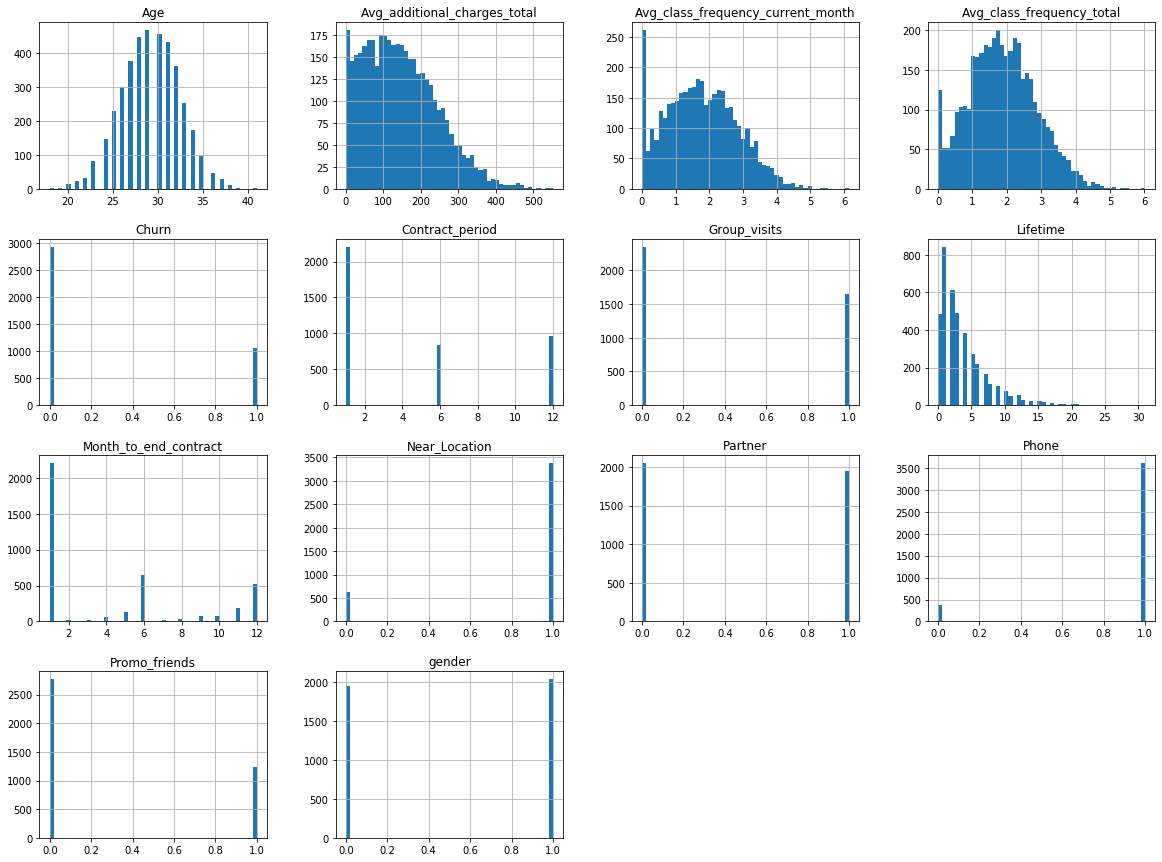

In [5]:

%matplotlib inline
df.hist(bins=50, figsize=(20,15))

plt.show()

Таблица представлена 4000 строк и 14 колонками

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Пропущенной информации нет. Все типы данных верные

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
Near_Location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
Partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
Promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
Phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
Contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
Group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
Age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
Avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
Month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


В выборке 50/50 мужчин и женщин; в основном клиенты клуба проживают в районе заведения; 48% - сотрудники компании-партнёра клуба; 30% клиентов пришли от друзей или знакомых; 90% есть инфо о телефоне; половина клиентов с абонентом длительностью 1 месяц, а средний период 4.68 месяцев; 41% посещали групповые занятия; средий возраст клиентов 29 лет; средняя выручка от доп услуг клуба составили 146 руб; у половины пользователей абонемент заканчивается чере месяц; в среднем пользователи пользовались клубом 3.72 месяца; в среднем клиенты посещали фитнес клуб 1.87 раз в неделю; в среднем в предыдущем месяце клиенты посещали клуб 1.76 раз в неделю (чуть меньше среднего показателя за весь период); 26.5 % клиентов, которые перестали пользоваться услугами компании.

In [8]:
df.duplicated().sum()

0

Дубликатов нет

##### ВЫВОД

В данных нет пропущенной информации, нет дубликатов. Единственное что можно поправить - привести названия столбцов к нижнему регистру. Таблица с данными состоит из 4000 строк и 14 колонок.

В выборке 50/50 мужчин и женщин; в основном клиенты клуба проживают в районе заведения; 48% - сотрудники компании-партнёра клуба; 30% клиентов пришли от друзей или знакомых; 90% есть инфо о телефоне; половина клиентов с абонентом длительностью 1 месяц, а средний период 4.68 месяцев; 41% посещали групповые занятия; средий возраст клиентов 29 лет; средняя выручка от доп услуг клуба составили 146 руб; у половины пользователей абонемент заканчивается чере месяц; в среднем пользователи пользовались клубом 3.72 месяца; в среднем клиенты посещали фитнес клуб 1.87 раз в неделю; в среднем в предыдущем месяце клиенты посещали клуб 1.76 раз в неделю (чуть меньше среднего показателя за весь период); 26.5 % клиентов, которые перестали пользоваться услугами компании.

## Преобработка данных

<a id="cell2"></a>

In [9]:
# приведем к нижнему регистру названия столбцов таблицы 
df.columns = df.columns.str.lower()

In [10]:
df.head(3)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0


Данные преобработаны можно приступать к анализу данных

## Анализ данных

### Анализ данных (EDA)

<a id="cell3"></a>

In [11]:
# посмотрим средние показатели оставшихся и ушедших клиентов
df.groupby('churn').mean().T

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


Если сравнивать клиентов которые ушли и которые остались то на основании средних показателей можно сказать следующее: 

- в обоих группах поровну мужчин и женщин;
- клиенты в основном проживают не подалеку;
- среди клиентов продолжающих посещать клуб больше сотрудников компании-партнёра клуба;
- также в данной группе больше клиентов которые пришли от друзей/знакомых;
- у клиентов которые продолжают посещать клуб в 3 раза больше период контракта;
- также данные клиенты больше посещают групповые занятия (46% против 26%);
- ушедшие клинты чуть моложе (26 лет против 29);
- оставшиеся клиенты примерно на 37% принесли больше выручки на доп услуги клуба;
- у оставшихся клиентов больше срок до окончания абонемента и практически в 5 раз выше lifetime;
- также данные клиенты чаще посещают клуб (2 раза в неделю против 1.47)  и в предыдущем месяце (2 раза против 1 )


In [12]:
# посмотрим распределения признаков клиентов оставшихся и ушедших на графиках
# сделаем срез по клиентам (churn = 0 - те кто остался, 1 - кто ушел)
stayed=df[df['churn']==0]
churn=df[df['churn']==1]

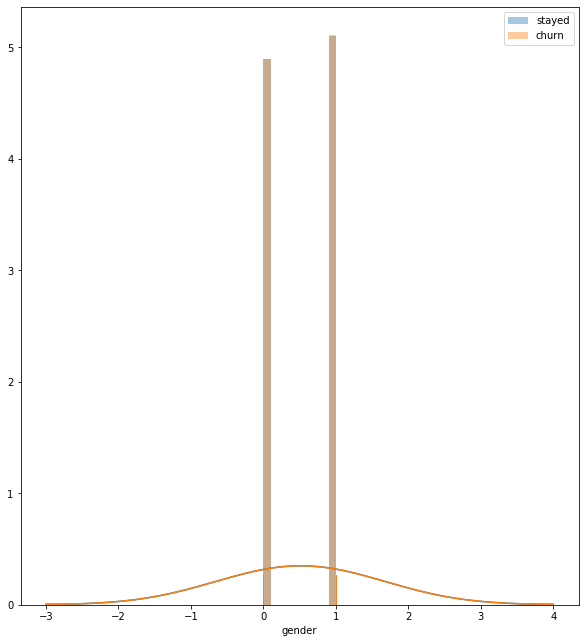

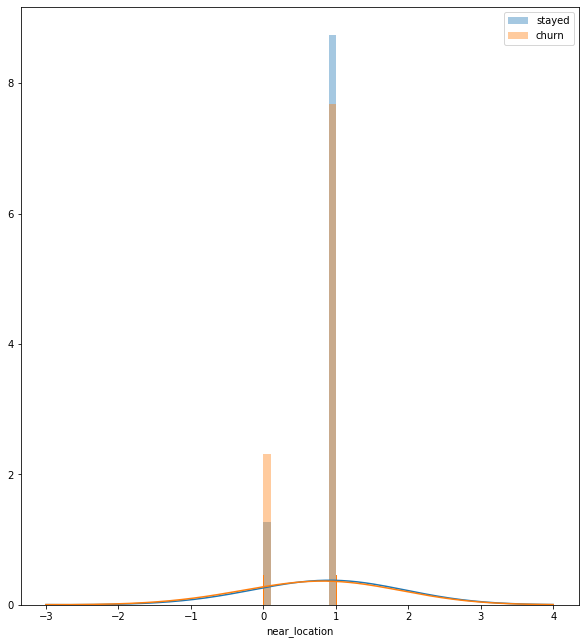

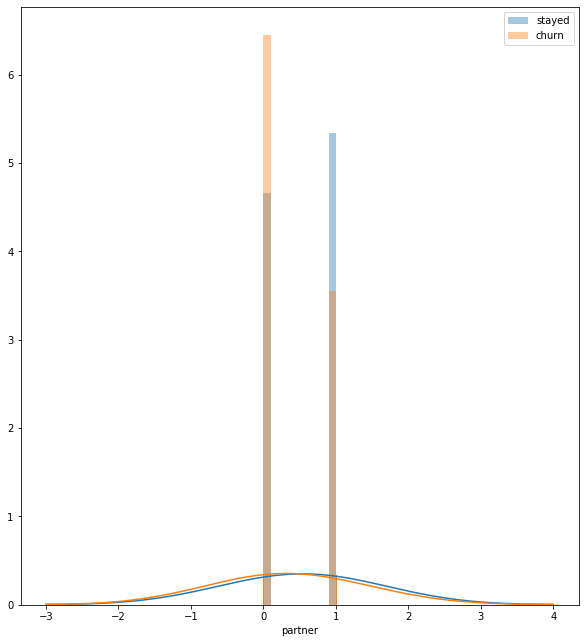

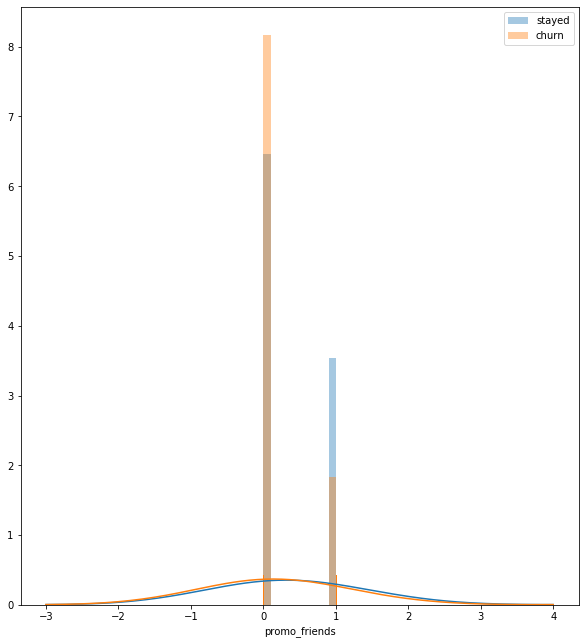

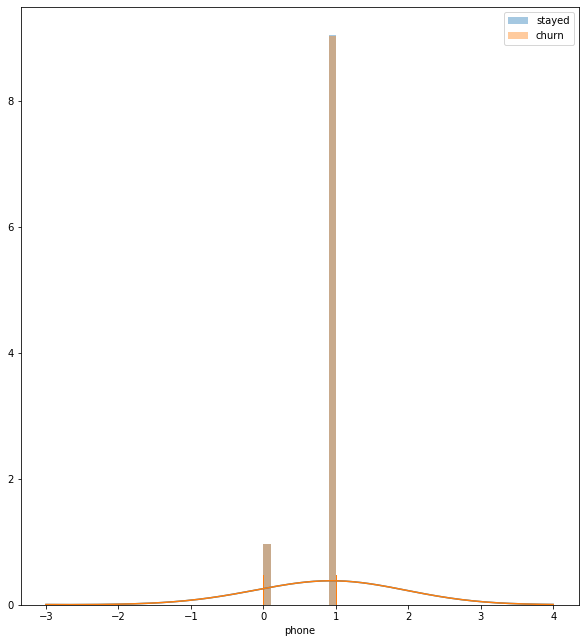

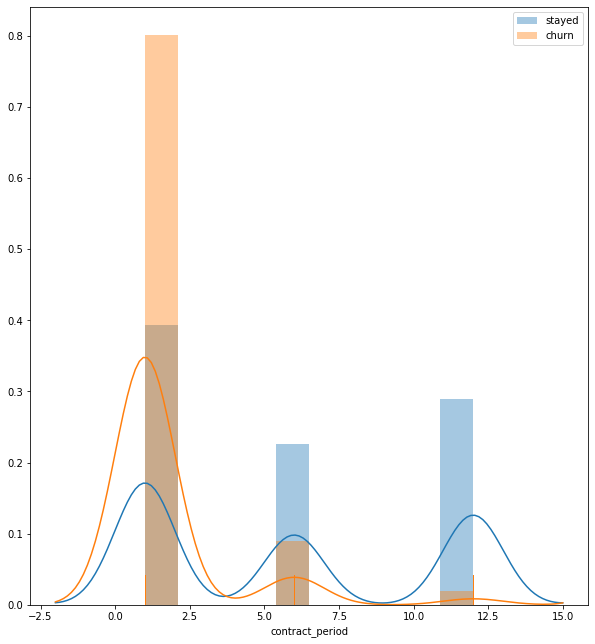

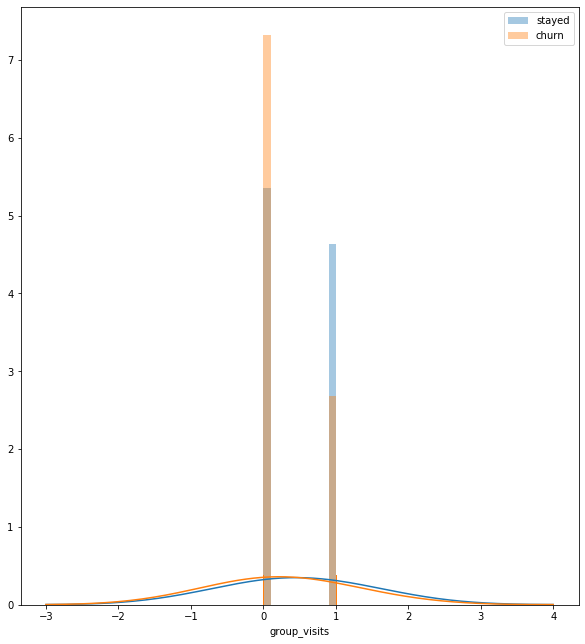

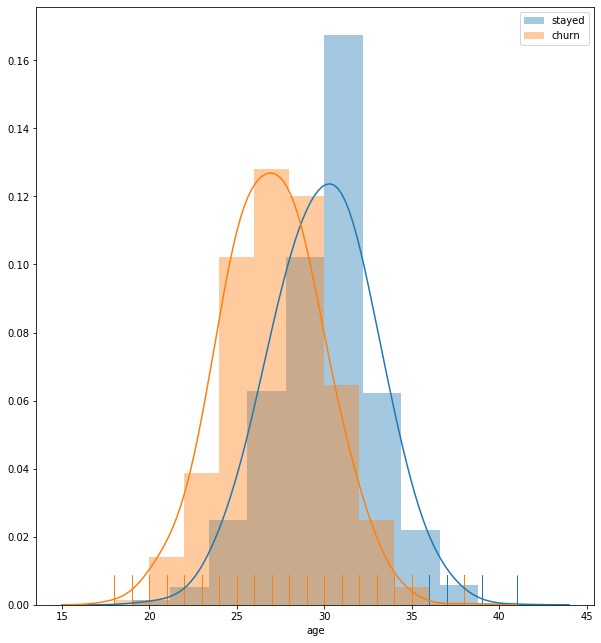

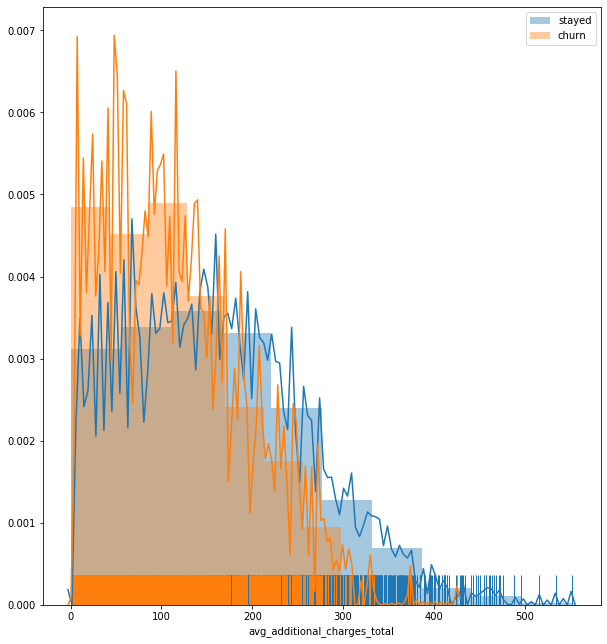

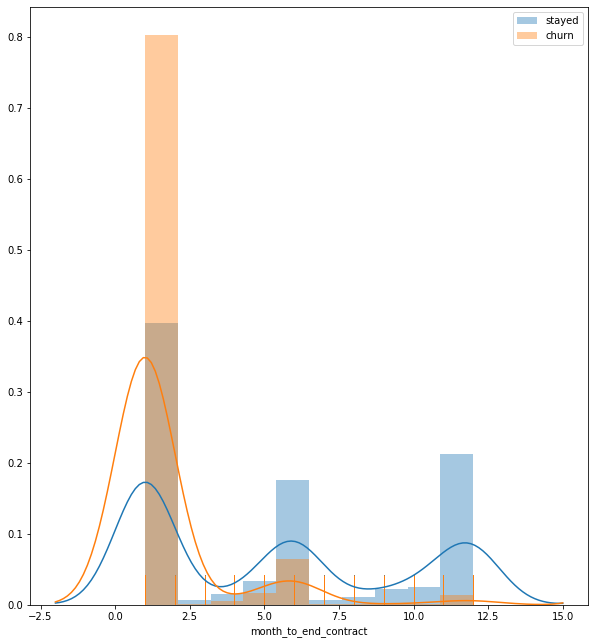

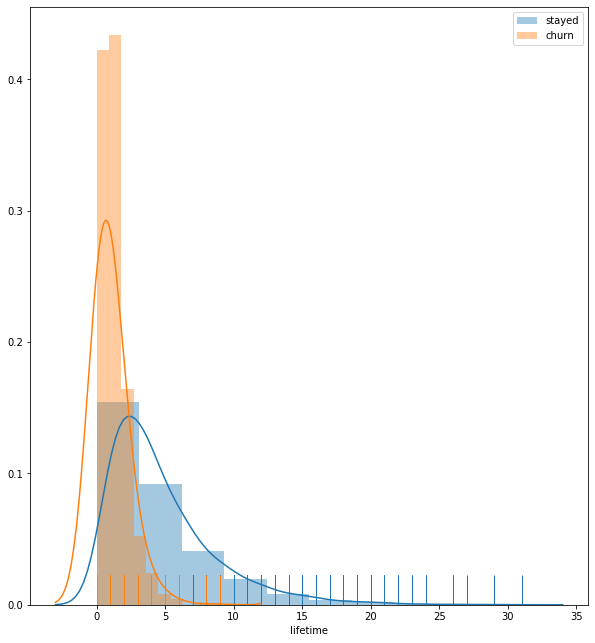

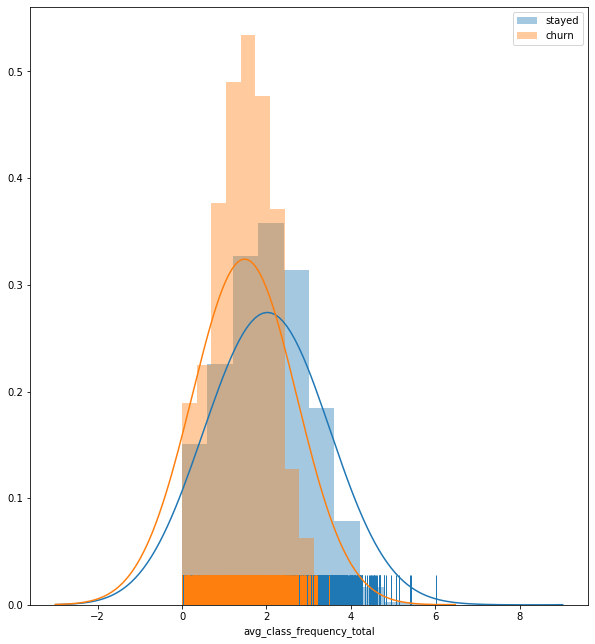

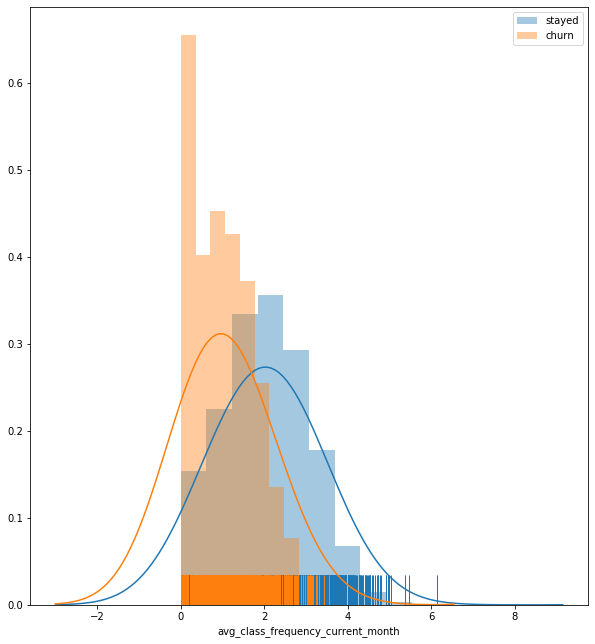

C:\Users\MaNi\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\MaNi\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


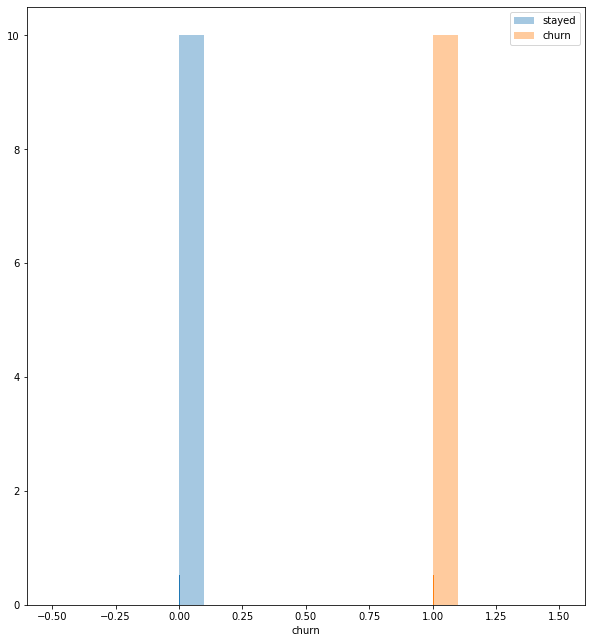

In [13]:

for feature in df.columns:
    plt.figure(figsize=(10, 11))
    sns.distplot(stayed[feature],label='stayed', bins = 10,rug = True, kde_kws = {'bw' : 1})
    sns.distplot(churn[feature],label='churn', bins = 10,rug = True, kde_kws = {'bw' : 1})
    plt.legend()
    plt.show()
      
    

Распределиние данных у клиентов продолжающие посещать фитнес-клуб распределиние в основном нормальное, а у ушедших клиентов присутсвует очень странное распределение

In [14]:
# для выявления связей между признаками построим корреляционную матрицу
corr_m = df.corr() 

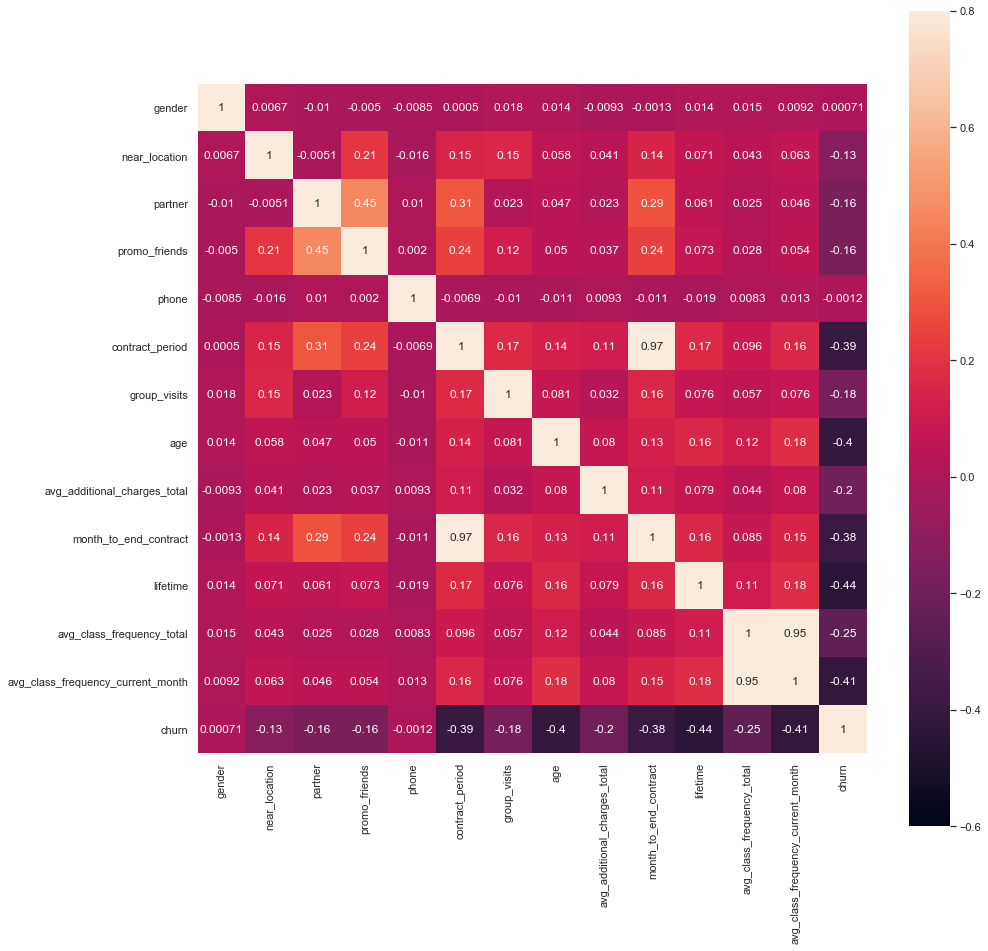

In [15]:
# визуализируем матрицу методом heatmap()
sns.set(style='white')
plt.figure(figsize=(15, 15))

sns.heatmap(corr_m, annot=True,square = True, vmin=-0.6, vmax=0.8)

Сильно коррелируются следующие признаки: срок до окончания абонемента и длительнотсь абонемента; средняя частота посещений за весь период и средняя частота посещений за предыдущий месяц. Для построения модели бинарной классификации пользователей необходимо удалить сильно коррелирующие признаки.

In [16]:
# удалим сильно коррелирующие признаки
df=df.drop(['month_to_end_contract','avg_class_frequency_current_month'],axis=1)

In [17]:
df.head(3)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_total,churn
0,1,1,1,1,0,6,1,29,14.227470,3,0.020398,0
1,0,1,0,0,1,12,1,31,113.202938,7,1.922936,0
2,0,1,1,0,1,1,0,28,129.448479,2,1.859098,0


Данные проанализированы, регуляризация выполнена - можно приступать к постоению моделей прогнозирования оттока

## Модель прогнозирования оттока пользователей

<a id="cell4"></a>

##### Логистическая регрессия

In [18]:
# определим функцию, которая будет выводить метрики
def metrics(y_true, y_pred, y_proba, title = 'Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

In [19]:
# разделим данные на признаки (матрица X) и целевую переменную (y)
X = df.drop('churn', axis = 1)
y = df['churn']

In [20]:
# разделиv модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
# зададим алгоритм для модели
model =LogisticRegression()
# обучим модель
model.fit(X_train, y_train)

C:\Users\MaNi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
# прогнозируем
lr_predictions = model.predict(X_test)
lr_probabilities = model.predict_proba(X_test)[:,1]

##### Ансамбли деревьев: случайный лес

In [23]:
# зададим алгоритм для модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)

In [24]:
# обучим модель случайного леса
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [25]:
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test) # Ваш код здесь
rf_probabilities =rf_model.predict_proba(X_test)[:,1]

In [26]:
# Сравним метрики accuracy, precision и recall для обеих моделей
metrics(y_test, lr_predictions, lr_probabilities , title='Метрики для модели логистической регрессии:')
print('____________________________________________________________________________________')
metrics(y_test, rf_predictions, rf_probabilities, title = 'Метрики для модели случайного леса:')
print('____________________________________________________________________________________')

Метрики для модели логистической регрессии:
	Accuracy: 0.87
	Precision: 0.73
	Recall: 0.77
____________________________________________________________________________________
Метрики для модели случайного леса:
	Accuracy: 0.89
	Precision: 0.78
	Recall: 0.77
____________________________________________________________________________________


Обе модели показали неплохие результаты: доля правильных ответов более 88%, метрики точности и полноты более 75%. Чуть получше показала себя модель случайного леса.

## Кластеризация пользователей

<a id="cell5"></a>

In [27]:
# при кластеризании не будем использовать столбец 'churn'
cluster=df.drop('churn',axis=1)

In [28]:
cluster.head(3)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_total
0,1,1,1,1,0,6,1,29,14.227470,3,0.020398
1,0,1,0,0,1,12,1,31,113.202938,7,1.922936
2,0,1,1,0,1,1,0,28,129.448479,2,1.859098


In [29]:
# стандартизируем данные
sc = StandardScaler()
x_sc = sc.fit_transform(cluster)

In [30]:
# построим матрицу расстояний 
linked = linkage(x_sc, method = 'ward')

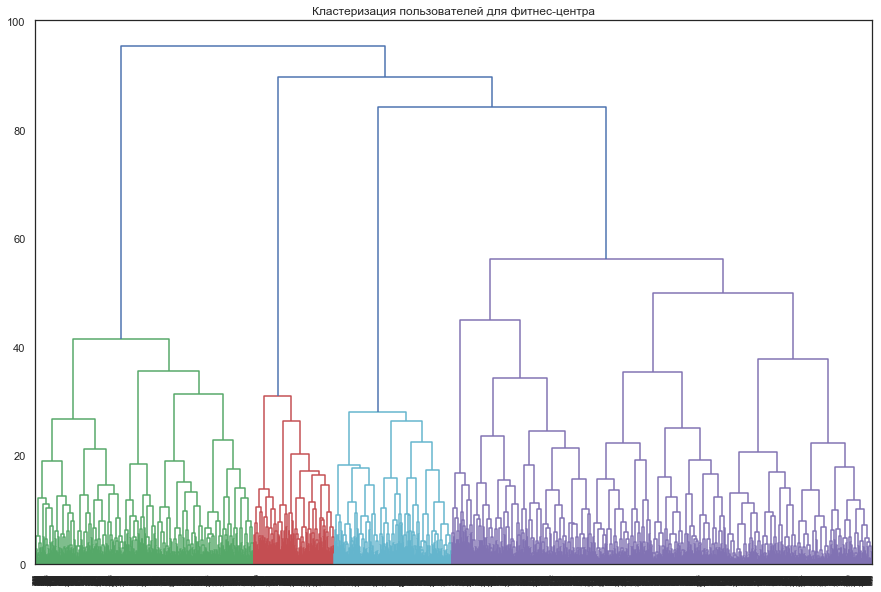

In [31]:
# строим дендрограмму
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Кластеризация пользователей для фитнес-центра')
plt.show()

Модель выявила 4 кластера. Рассмотрим другой способ кластеризации - алгоритм K-Means.

In [32]:
 # задаём число кластеров, равное 5
km = KMeans(n_clusters = 5)

 # применяем алгоритм к данным и формируем вектор кластеров
labels = km.fit_predict(x_sc) # применяем алгоритм к данным и формируем вектор кластеров

In [33]:
# сохраняем метки кластера в поле нашего датасета
cluster['cluster_km'] = labels
cluster.head(3)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_total,cluster_km
0,1,1,1,1,0,6,1,29,14.227470,3,0.020398,3
1,0,1,0,0,1,12,1,31,113.202938,7,1.922936,0
2,0,1,1,0,1,1,0,28,129.448479,2,1.859098,1


In [34]:
# выводим статистику по средним значениям наших признаков по кластеру
cluster_group=cluster.groupby('cluster_km').mean().reset_index()

In [35]:
cluster_group

,cluster_km,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_total
0,0,0.524798,0.995386,0.437140,0.011534,1.0,6.993080,0.529412,30.761246,179.277053,5.758939,2.322337
1,1,0.510050,1.000000,0.187605,0.056114,1.0,1.945561,0.316583,27.943049,124.326285,2.107203,1.555590
2,2,0.497992,0.994980,0.893574,1.000000,1.0,6.863454,0.520080,29.534137,152.377724,4.226908,1.955528
3,3,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,3.940415,1.854211
4,4,0.500898,0.000000,0.488330,0.077199,1.0,2.978456,0.231598,28.685817,137.277472,2.978456,1.762672


2 - клуб недалеко (95%), на 95% сотрудники компании-партнёра клуба, 99% использовали промо-код от знакомого при оплате первого абонемента, у данного кластера самый продолжительный период действующего абонемента (7 месяцев), половина клиентов данной группы посещают групповые занятия. 
 
3 -  клуб недалеко (100%), на 25% сотрудники компании-партнёра клуба, всего 7.8% акция "приведи друга", 100% посещений групповых занятий

0 - клуб недалеко (86%), на 47% сотрудники компании-партнёра клуба, 30% пришли от друзей, 42% посещений групповых занятий

1 - клуб недалеко (100%), на 30% сотрудники компании-партнёра клуба, всего 5% акция "приведи друга", нет посещений групповых занятий

4 - клуб далеко , на 48% сотрудники компании-партнёра клуба, всего 7.6% акция "приведи друга",  23% посещений групповых занятий

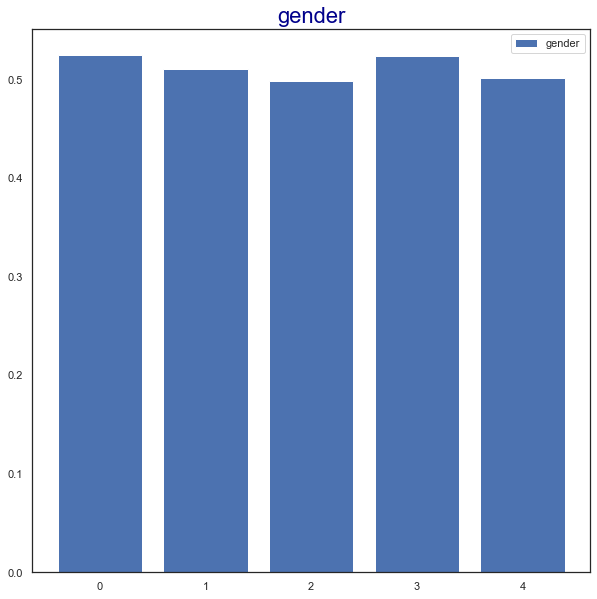

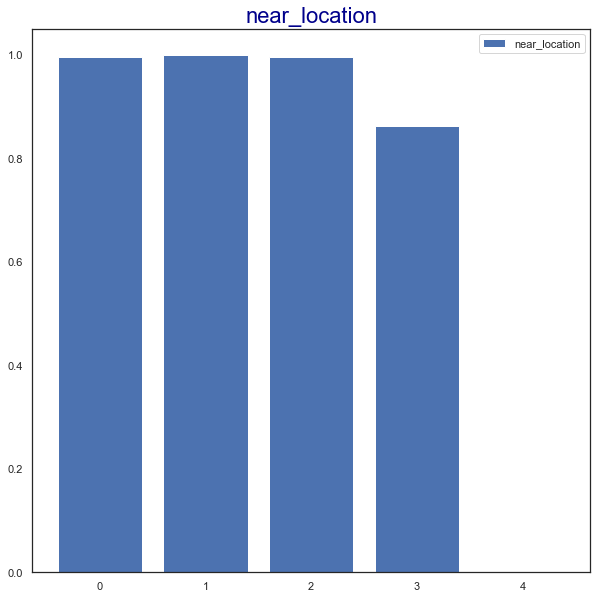

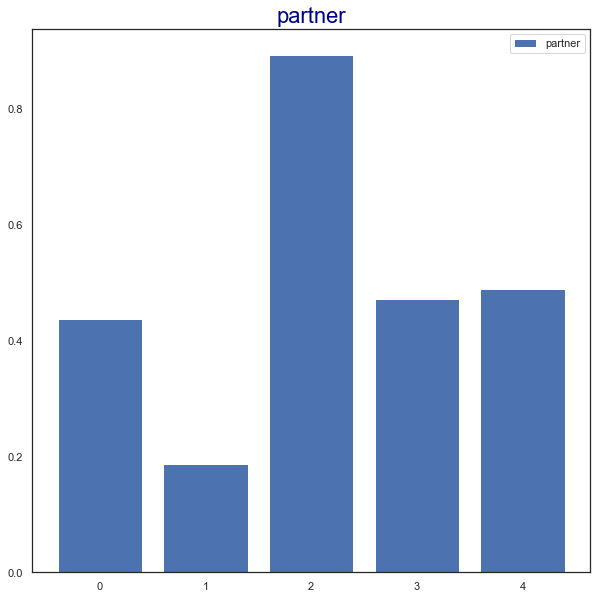

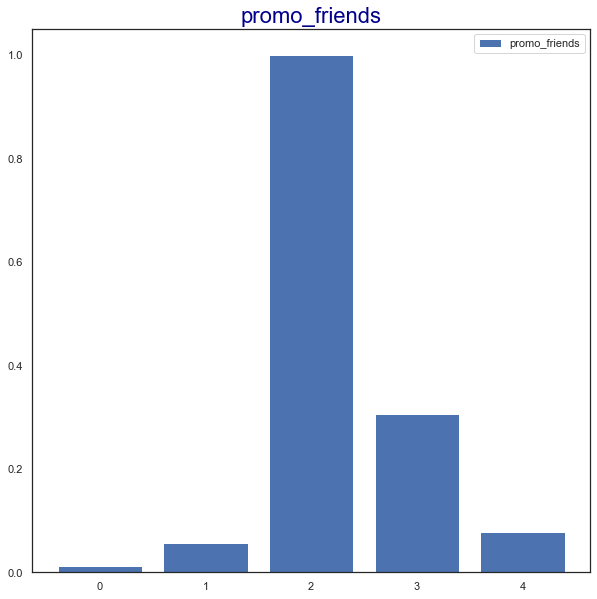

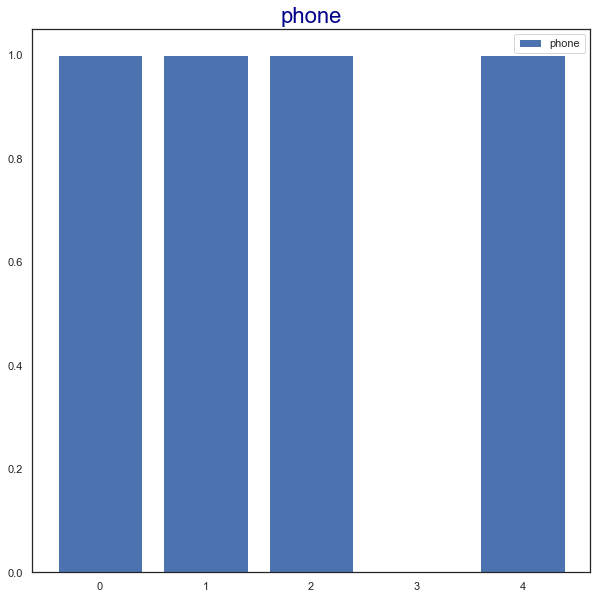

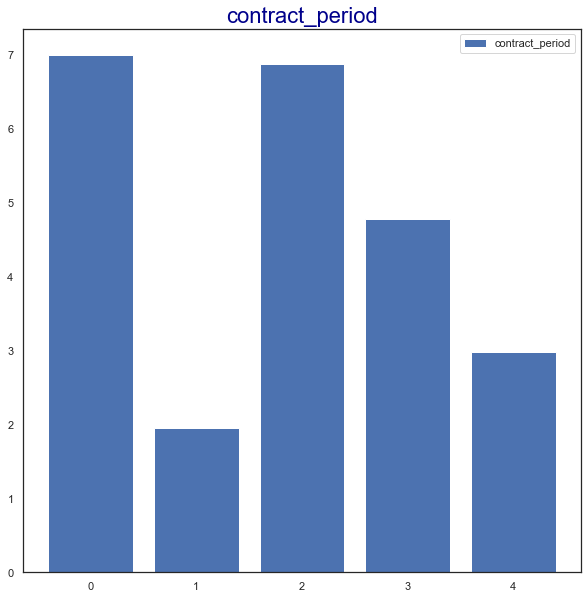

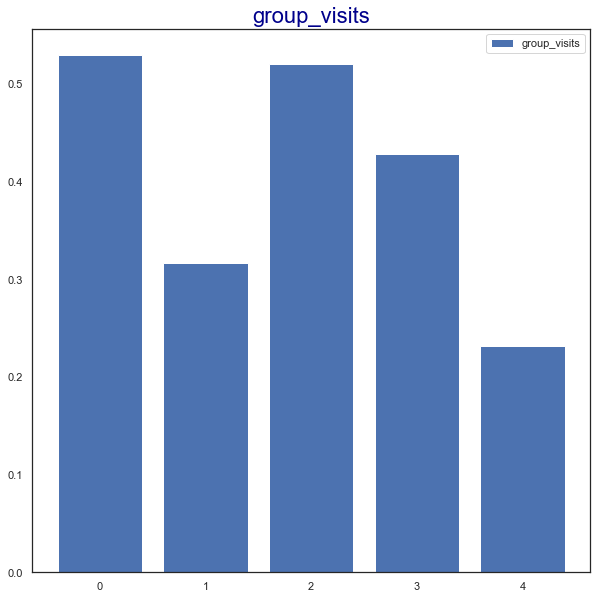

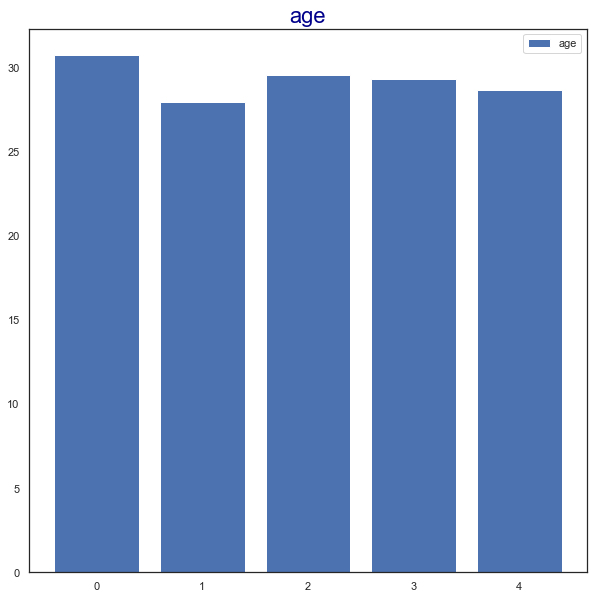

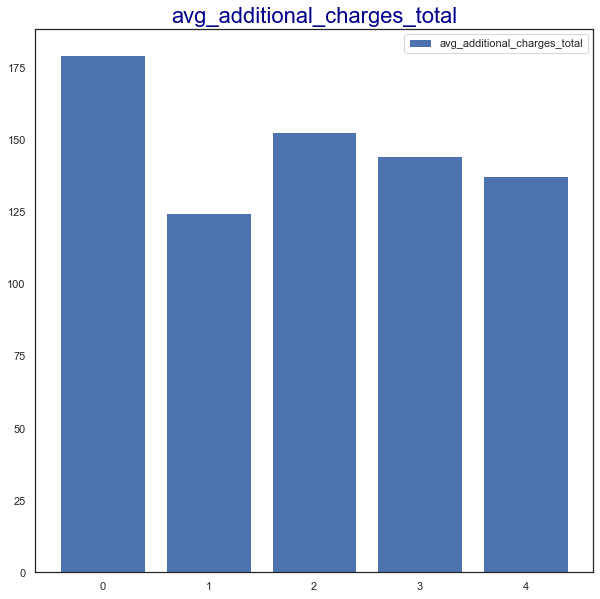

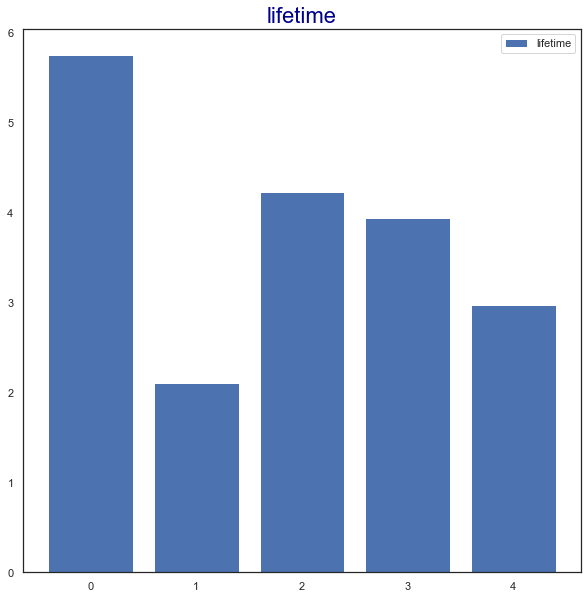

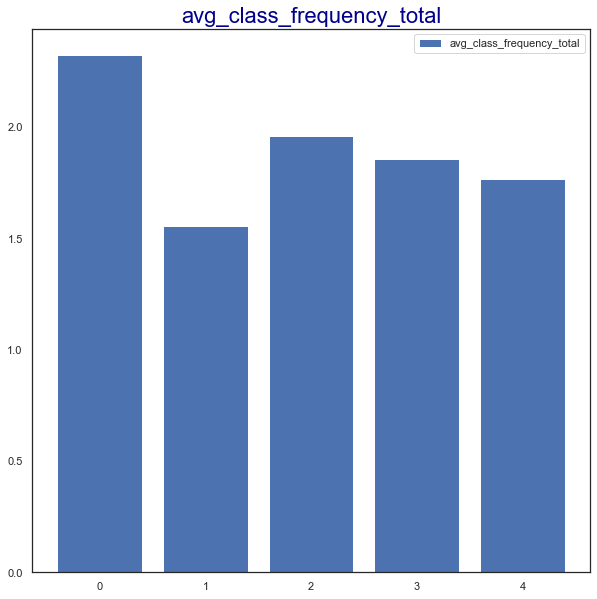

In [36]:
# визуализируем данные по кластерам
for feature in cluster_group.drop('cluster_km',axis=1).columns:
    plt.figure(figsize=(10, 10))
    plt.bar(cluster_group['cluster_km'],cluster_group[feature], label=feature)
    plt.title(feature, fontdict={'size':22},color = 'darkblue')
    plt.legend()
    plt.show()

In [37]:
# к таблице df добавим столбец cluster_km из таблицы cluster
df=pd.concat([df,cluster['cluster_km']],axis=1)

In [38]:
df.head(3)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_total,churn,cluster_km
0,1,1,1,1,0,6,1,29,14.227470,3,0.020398,0,3
1,0,1,0,0,1,12,1,31,113.202938,7,1.922936,0,0
2,0,1,1,0,1,1,0,28,129.448479,2,1.859098,0,1


In [39]:
churn=df.groupby('cluster_km')['churn'].sum().reset_index()

In [40]:
churn['part_churn']=churn['churn']/churn['churn'].sum()

In [41]:
churn.sort_values(by='part_churn')

,cluster_km,churn,part_churn
0,0,11,0.010368
3,3,103,0.097078
2,2,131,0.123468
4,4,224,0.211122
1,1,592,0.557964


###### ВЫВОД

Для компании самым интересным является кластер номер 0. Кластер с наибольшей долей оттока - кластер 1. Рассмотрим характеристики каждого кластера по отдельности от наименьшей долей оттока к наибольшей. 

Номер 0 (отток 10%): клуб недалеко (86%), на 47% сотрудники компании-партнёра клуба, 30% пришли от друзей, 42% посещений групповых занятий

Номер 2 (отток 12%): клуб недалеко (95%), на 95% сотрудники компании-партнёра клуба, 99% использовали промо-код от знакомого при оплате первого абонемента, у данного кластера самый продолжительный период действующего абонемента (7 месяцев), половина клиентов данной группы посещают групповые занятия (50%)

Номер 3 (отток 16%): клуб недалеко (100%), на 25% сотрудники компании-партнёра клуба, всего 7.8% акция "приведи друга", 100% посещений групповых занятий

Номер 4 (отток 21%): клуб далеко , на 48% сотрудники компании-партнёра клуба, всего 7.6% акция "приведи друга",  23% посещений групповых занятий

Номер 1 (отток 40%): клуб недалеко (100%), на 30% сотрудники компании-партнёра клуба, всего 5% акция "приведи друга", нет посещений групповых занятий



# Общий вывод и рекомендации 

<a id="cell6"></a>

Алгоритмом K-Means мы выделили 5 кластеров. Каждый кластер имеет рамзные характеристики и доли оттока. Самым преданныам является кластер 0, а кластер с наибольшей долей оттока - номер 1. Причем основной признак отличающий данный кластер (№1) от остальных - клиенты не посещают групповые занятия. Поэтому основной рецепт успеха фитнес клуба - групповые занятия (возможно у компании немного фитнес-инструкторов, либо не умеют привлекать клиентов к групповым занятиям)

Залог успеха:

- месторасположение (как ни странно) не влияет на отток клиентов;
- акция "приведи друга" не только влияет на количество клиентов, но и на их удержание (вместе с другом веселее);
- клиенты посещающие групповые занятия с большей вероятностью продержаться дольше;
- скидки клиентам компаний-партнеров возможно привлекают клиентов, но особо на удержание не влияют.

Т.е акцентировать компании необходимо на привлечении друзей/знакомых клиентов (соц. сети, акции) и на привлечения клиентов к групповым занятиям (новые инструкторы, новые программы, удобное время посещения)
